# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [4]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

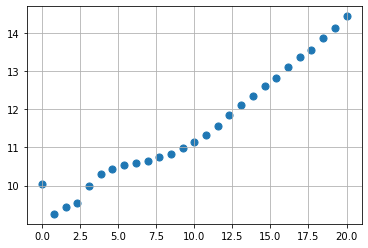

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

m = 27 # El número de muestras son 26, que son los datos del 2014 al 2040
x = np.linspace(0, 20, m)
y = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 50)
plt.grid()

In [14]:
def funcion_de_costo(beta, X, y) :
    beta = np.reshape(beta, [2, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

In [15]:
# Matriz X de polinomio de grado 1
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
X = np.hstack( (ones, x_1) )

In [16]:
beta_inicial = np.random.rand(2) # vector aleatorio de 2 porque beta tiene 2 elementos
y = np.reshape(y, [m, -1])

In [17]:
funcion_de_costo(beta_inicial, X, y)

1548.804776064021

In [18]:
import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 2.3704889518148637
 hess_inv: array([[ 0.07010662, -0.0051589 ],
       [-0.0051589 ,  0.00051591]])
      jac: array([2.98023224e-08, 2.08616257e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([9.11567625, 0.24267173])

In [21]:
y_pred1 = 9.11567625 + 0.24267173*x

In [22]:
def funcion_de_costo(beta, X, y) :
    beta = np.reshape(beta, [3, -1]) #porque pára este caso beta es un vector con 3 elementos, estamos forzando que sea un vector columna, para eso es el reshape
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
X = np.hstack( (ones, x_1, x_2) )

beta_inicial = np.random.rand(3)
y = np.reshape(y, [m, -1])

funcion_de_costo(beta_inicial, X, y)

166226.10760168216

In [23]:
import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 0.8443845166074282
 hess_inv: array([[ 1.44225510e-01, -2.82840730e-02,  1.15626713e-03],
       [-2.82840730e-02,  7.73097987e-03, -3.60755341e-04],
       [ 1.15626713e-03, -3.60755341e-04,  1.80377670e-05]])
      jac: array([0.00000000e+00, 1.26659870e-07, 4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([9.59129685e+00, 9.42781029e-02, 7.41968137e-03])

In [24]:
y_pred_2 = 9.59129685e+00 + 9.42781029e-02*x + 7.41968137e-03*x**2

In [6]:
import numpy as np
m = 27
x = np.linspace(0, 20, m)
y = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])



def funcion_de_costo(beta, X, y) :
    beta = np.reshape(beta, [4, -1]) #porque pára este caso beta es un vector con 4 elementos, estamos forzando que sea un vector columna, para eso es el reshape
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
X = np.hstack( (ones, x_1, x_2, x_3) )

beta_inicial = np.random.rand(4)
y = np.reshape(y, [m, -1])

funcion_de_costo(beta_inicial, X, y)

50137235.65478173

In [7]:
import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 0.8404169183092955
 hess_inv: array([[ 2.27239543e-01, -8.33500526e-02,  8.17095366e-03,
        -2.33822887e-04],
       [-8.33500526e-02,  4.42580810e-02, -5.01383085e-03,
         1.55102518e-04],
       [ 8.17095366e-03, -5.01383085e-03,  6.10778797e-04,
        -1.97580344e-05],
       [-2.33822887e-04,  1.55102518e-04, -1.97580344e-05,
         6.58601150e-07]])
      jac: array([-7.45058060e-09, -2.45869160e-07, -2.98023224e-08, -1.04308128e-07])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([9.56646842e+00, 1.10747629e-01, 5.32167883e-03, 6.99334210e-05])

In [ ]:
y_pred3 = 9.56646842e+00 + 1.10747629e-01*x + 5.32167883e-03*x**2 + 6.99334210e-05**x*3

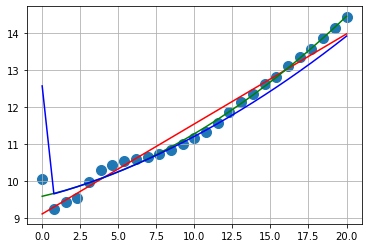

In [25]:
y_pred1 = 9.11567625 + 0.24267173*x
y_pred2 = 9.59129685e+00 + 9.42781029e-02*x + 7.41968137e-03*x**2
y_pred3 = 9.56646842e+00 + 1.10747629e-01*x + 5.32167883e-03*x**2 + 6.99334210e-05**x*3

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x, y, s = 100)
plt.plot(x, y_pred1, "r")
plt.plot(x, y_pred2, "g")
plt.plot(x, y_pred3, "b")
plt.grid()

## Resultados

Para este ejercicio propuse tres modelos, un modelo basado en un polinimio de grado 1, un modelo de polinomio de grado 2 y un modelo de polinomio de grado 3. Los modelos obtenidos fueron los siguientes:

- $ y = 0.24267173x + 9.1156762 $
- $ y = 7.41968137e-03x^2 + 9.42781029e-02x + 9.59129685e+00 $
- $ y = 6.99334210e-05x^3 + 5.32167883e-03x^2 + 1.10747629e-01x + 9.56646842e+00 $

Viendo el gráfico obtenido, el polinomio de grado **2** y grado **3** son los modelos que mejor se ajustan a los puntos

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [4]:
import pandas as pd
pd.read_csv?

In [5]:
data = pd.read_csv('population_data.csv')

In [6]:
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


In [48]:
import numpy as np
import matplotlib.pyplot as plt

x_1 = np.array(data["Year"])
y_1 = np.array(data["Poblacion"])
m = 66

In [18]:
x_1

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)

In [21]:
y_1

array([  296,  1110,  1980,  2904,  3880,  4906,  5978,  7095,  8253,
        9448, 10677, 11939, 13234, 14564, 15931, 17339, 18784, 20264,
       21788, 23361, 24988, 26669, 28396, 30156, 31931, 33708, 35486,
       37261, 39013, 40715, 42353, 43916, 45416, 46880, 48351, 49859,
       51410, 52999, 54635, 56327, 58077, 59890, 61758, 63654, 65542,
       67393, 69202, 70969, 72679, 74317, 75874, 77340, 78724, 80056,
       81382, 82732, 84117, 85530, 86968, 88423, 86255, 87683, 89054,
       90395, 91713, 93005], dtype=int64)

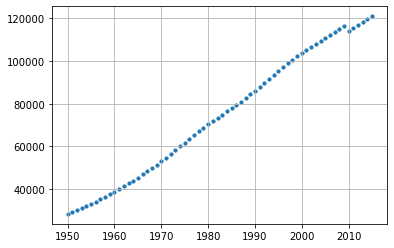

In [49]:
%matplotlib inline
plt.figure()
plt.scatter(x_1, y_1, s = 10)
plt.grid()

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(data["Year"]) - 1940
y = np.array(data["Poblacion"]) - 28000
m = 66

def funcion_poblacion_contra_años(beta, X, y) :
    beta = np.reshape(beta, [2, -1])
    pred = X @ beta
    resultado = (y-pred).T @ (y-pred)
    return resultado[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
X = np.hstack( (ones, x_1) )

beta_inicial = np.random.rand(2)
y = np.reshape(y, [m, -1])

funcion_poblacion_contra_años(beta_inicial, X, y)

198652728796.83246

In [29]:
import scipy.optimize as opt
sol = opt.minimize(funcion_poblacion_contra_años, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 212137169.61297113
 hess_inv: array([[ 4.52491887e-02, -8.86508501e-04],
       [-8.86508501e-04,  2.08606390e-05]])
      jac: array([ 0., -2.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 144
      nit: 6
     njev: 45
   status: 2
  success: False
        x: array([-19301.63935453,   1543.97186089])

In [63]:
y1 = -19301.63935453 + 1543.97186089*x

In [30]:
def funcion_poblacion_contra_años(beta, X, y) :
    beta = np.reshape(beta, [3, -1])
    pred = X @ beta
    resultado = (y-pred).T @ (y-pred)
    return resultado[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
X = np.hstack( (ones, x_1, x_2) )

beta_inicial = np.random.rand(3)
y = np.reshape(y, [m, -1])

funcion_poblacion_contra_años(beta_inicial, X, y)

182367116944.04236

In [31]:
import scipy.optimize as opt
sol = opt.minimize(funcion_poblacion_contra_años, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 210941621.45661366
 hess_inv: array([[ 1.04299708e-01, -5.23308753e-03,  5.61943057e-05],
       [-5.23308753e-03,  3.19725532e-04, -3.76532871e-06],
       [ 5.61943057e-05, -3.76532871e-06,  4.69484718e-08]])
      jac: array([  0.,   0., -12.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 216
      nit: 10
     njev: 51
   status: 2
  success: False
        x: array([-1.87029992e+04,  1.50871454e+03,  4.14806784e-01])

In [64]:
y2 = -1.87029992e+04 + 1.50871454e+03*x + 4.14806784e-01*x**2

In [36]:
def funcion_poblacion_contra_años(beta, X, y) :
    beta = np.reshape(beta, [4, -1])
    pred = X @ beta
    resultado = (y-pred).T @ (y-pred)
    return resultado[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
X = np.hstack( (ones, x_1, x_2, x_3) )

beta_inicial = np.random.rand(4)
y = np.reshape(y, [m, -1])

funcion_poblacion_contra_años(beta_inicial, X, y)

483239239221.9454

In [37]:
import scipy.optimize as opt
sol = opt.minimize(funcion_poblacion_contra_años, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 25240442.70940326
 hess_inv: array([[ 8.14011213e-01, -6.98894597e-02,  1.71376634e-03,
        -1.26268696e-05],
       [-6.98894597e-02,  6.39202591e-03, -1.62660499e-04,
         1.22780542e-06],
       [ 1.71376634e-03, -1.62660499e-04,  4.26010641e-06,
        -3.28483307e-08],
       [-1.26268696e-05,  1.22780542e-06, -3.28483307e-08,
         2.57634030e-10]])
      jac: array([0., 0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 160
      nit: 7
     njev: 32
   status: 0
  success: True
        x: array([-3.54711510e+03,  3.49926723e+01,  3.98423509e+01, -3.09235981e-01])

In [70]:
y3 = -3.54711510e+03 +  3.49926723e+01*x + 3.98423509e+01*x**2 + -3.09235981e-01*x**3

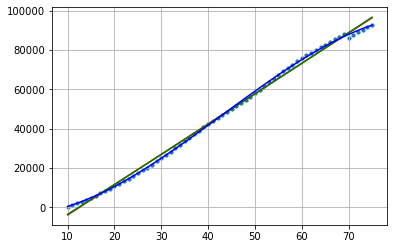

In [40]:
y1 = -19301.63935453 + 1543.97186089*x
y2 = -1.87029992e+04 + 1.50871454e+03*x + 4.14806784e-01*x**2
y3 = -3.54711510e+03 +  3.49926723e+01*x + 3.98423509e+01*x**2 + -3.09235981e-01*x**3

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 10)
plt.plot(x, y1, "r")
plt.plot(x, y2, "g")
plt.plot(x, y3, "b")
plt.grid()

## Resultados:

Se utilizaron los datos del archivo `csv`, y se acomodaron en listas con `np.array` para que los valores obtenidos no fueran números grandes.

Se utilizaron tres modelos diferentes, un modelo de polinomio de grado 1, un polinomio de grado 2, y un polinomio de grado 3

Los modelos con las betas obtenidas fueron las siguientes:

1. Modelo 1: $ y = -19301.63935453 + 1543.97186089x $
2. Modelo 2: $ y = -1.87029992e+04 + 1.50871454e+03x + 4.14806784e-01x^2 $
3. Modelo 3: $ y = -3.54711510e+03 + 3.49926723e+01x + 3.98423509e+01x^2 + -3.09235981e-01x^3 $

Según la gráfica y las tres curvas ajustadas, los tres modelos propuestos parecen tener un error mínimo con los puntos de los datos utilizados. Para obtener el modelo con el menor error, se obtendrá el error cuadrático de cada uno de los modelos o de las curvas.

---

## Parte 2

Repetición del punto 1, pero con los datos de Nacimientos como variable dependiete $y$

In [43]:
import pandas as pd

In [44]:
data = pd.read_csv('population_data.csv')

In [51]:
import numpy as np
import matplotlib.pyplot as plt

x2 = np.array(data["Year"])
y2 = np.array(data["Nacimientos"])
m = 66

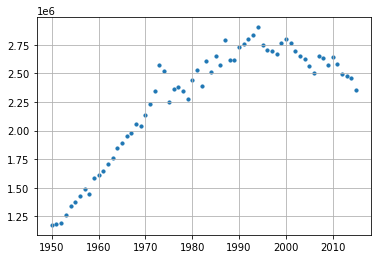

In [52]:
%matplotlib inline
plt.figure()
plt.scatter(x2, y2, s = 10)
plt.grid()

In [55]:
x = np.array(data["Year"]) - 1940
y = np.array(data["Nacimientos"]) - 1174000
m = 66

def funcion_poblacion_contra_años(beta, X, y) :
    beta = np.reshape(beta, [2, -1])
    pred = X @ beta
    resultado = (y-pred).T @ (y-pred)
    return resultado[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
X = np.hstack( (ones, x_1) )

beta_inicial = np.random.rand(2)
y = np.reshape(y, [m, -1])

funcion_poblacion_contra_años(beta_inicial, X, y)

96632700401066.03

In [56]:
import scipy.optimize as opt
sol = opt.minimize(funcion_poblacion_contra_años, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 4737918466370.432
 hess_inv: array([[ 4.50552385e-02, -8.82935939e-04],
       [-8.82935939e-04,  2.07943739e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 5
     njev: 13
   status: 0
  success: True
        x: array([168478.91614236,  21991.06854949])

In [57]:
y_1 = 168478.91614236 + 21991.06854949*x

In [60]:
x = np.array(data["Year"]) - 1940
y = np.array(data["Nacimientos"]) - 1174000
m = 66

def funcion_poblacion_contra_años(beta, X, y) :
    beta = np.reshape(beta, [3, -1])
    pred = X @ beta
    resultado = (y-pred).T @ (y-pred)
    return resultado[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
X = np.hstack( (ones, x_1, x_2) )

beta_inicial = np.random.rand(3)
y = np.reshape(y, [m, -1])

funcion_poblacion_contra_años(beta_inicial, X, y)

96278043269014.78

In [61]:
import scipy.optimize as opt
sol = opt.minimize(funcion_poblacion_contra_años, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 492921050195.33826
 hess_inv: array([[ 5.19077870e-02, -2.52650573e-03,  2.69563204e-05],
       [-2.52650573e-03,  1.73558859e-04, -2.13069575e-06],
       [ 2.69563204e-05, -2.13069575e-06,  2.82125403e-08]])
      jac: array([     0.,   8192., 417792.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 224
      nit: 9
     njev: 53
   status: 2
  success: False
        x: array([-9.58806610e+05,  8.84082484e+04, -7.81552502e+02])

In [62]:
y_2 = -9.58806610e+05 + 8.84082484e+04*x + -7.81552502e+02*x**2

In [63]:
def funcion_poblacion_contra_años(beta, X, y) :
    beta = np.reshape(beta, [4, -1])
    pred = X @ beta
    resultado = (y-pred).T @ (y-pred)
    return resultado[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
X = np.hstack( (ones, x_1, x_2, x_3) )

beta_inicial = np.random.rand(4)
y = np.reshape(y, [m, -1])

funcion_poblacion_contra_años(beta_inicial, X, y)

77662282712320.44

In [64]:
import scipy.optimize as opt
sol = opt.minimize(funcion_poblacion_contra_años, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 441783032451.658
 hess_inv: array([[ 6.56110905e-01, -5.64171107e-02,  1.38413728e-03,
        -1.02036576e-05],
       [-5.64171107e-02,  5.23871242e-03, -1.34355581e-04,
         1.01938019e-06],
       [ 1.38413728e-03, -1.34355581e-04,  3.56388419e-06,
        -2.77146033e-08],
       [-1.02036576e-05,  1.01938019e-06, -2.77146033e-08,
         2.19749913e-10]])
      jac: array([0.00000000e+00, 4.50560000e+04, 4.58342400e+06, 2.72314368e+08])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 317
      nit: 11
     njev: 61
   status: 2
  success: False
        x: array([-7.08241165e+05,  6.40203522e+04, -1.28725400e+02, -5.12192855e+00])

In [66]:
y3 = -7.08241165e+05 + 6.40203522e+04*x +  -1.28725400e+02*x**2 + -5.12192855e+00*x**3

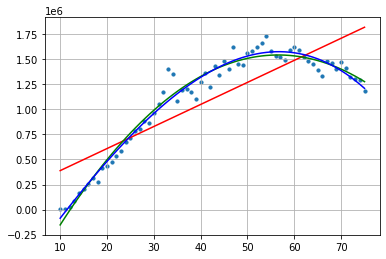

In [67]:
y1 = 168478.91614236 + 21991.06854949*x
y2 = -9.58806610e+05 + 8.84082484e+04*x + -7.81552502e+02*x**2
y3 = -7.08241165e+05 + 6.40203522e+04*x +  -1.28725400e+02*x**2 + -5.12192855e+00*x**3


import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 10)
plt.plot(x, y1, "r")
plt.plot(x, y2, "g")
plt.plot(x, y3, "b")
plt.grid()

## Resultados:

Se utilizaron los datos del archivo `csv`, y se acomodaron en listas con `np.array` para que los valores obtenidos no fueran números grandes.

Se utilizaron tres modelos diferentes, un modelo de polinomio de grado 1, un polinomio de grado 2, y un polinomio de grado 3

Los modelos con las betas obtenidas fueron las siguientes:

1. Modelo 1: $ y = 168478.91614236 + 21991.06854949x $
2. Modelo 2: $ y = -9.58806610e+05 + 8.84082484e+04x + -7.81552502e+02x^2 $
3. Modelo 3: $ y = -7.08241165e+05 + 6.40203522e+04x +  -1.28725400e+02x^2 + -5.12192855e+00x^3 $

Según la gráfica y las tres curvas ajustadas, el modelo de polinomio de grado 1 no se ajusta bien a los puntos de los datos, en cambio los modelos de polinomio de grado 2 y grado 3 se ajustan mejor. Para obtener el modelo con el menor error, se obtendrá el error cuadrático de los modelos o de las curvas de grado 2 y de grado 3.>